# Sea Ice Levels
## Jerry Barrows-Fitzgerald

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## This dataset shows sea ice levels over time, making it a good candidate for time-based analysis

In [2]:
df = sns.load_dataset("seaice")
df.describe()

,Extent
count,13175.000000
mean,11.289508
std,3.284901
min,3.340000
25%,8.551500
50%,11.982000
75%,14.204500
max,16.412000


## This shows the ebb and flow of the ice levels each year, and although it is possible to detect a slight downward trend, there is too much noise in this lineplot to be particularly useful.

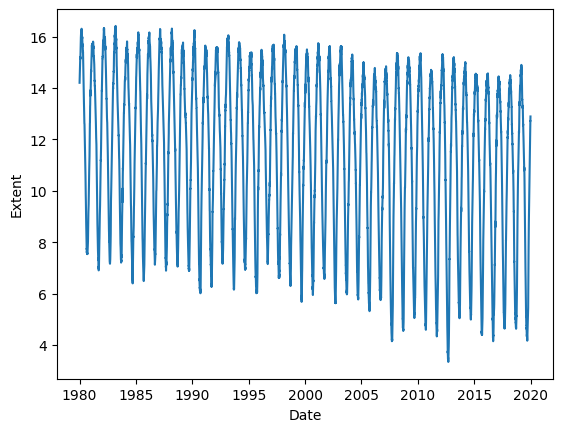

In [3]:
sns.lineplot(data=df, x="Date", y="Extent")
plt.show()

## Breaking the data into months may provide for some more meaningful analysis.

<AxesSubplot: xlabel='Month', ylabel='Extent'>

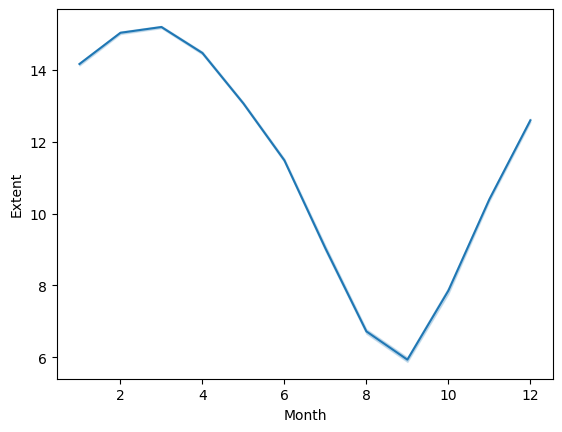

In [4]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
sns.lineplot(x='Month', y='Extent', data=df)

## It appears that March is the month with the most sea ice, and September is the month with the least. Let's view the data for these months over time:

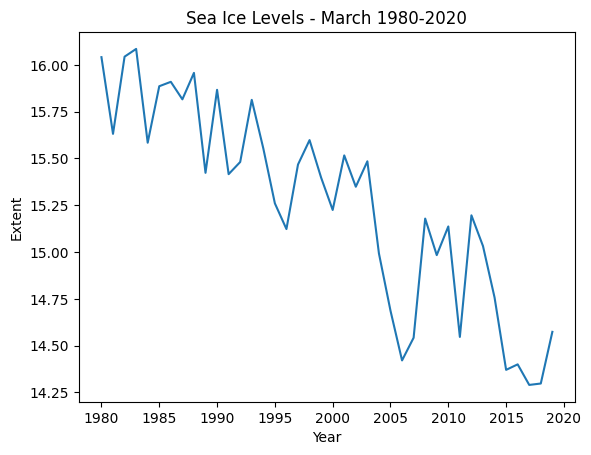

In [5]:
march_data = df[df['Month'] == 3]
sept_data = df[df['Month'] == 9]
march_avg = march_data.groupby('Year')['Extent'].mean().reset_index()
sept_avg = sept_data.groupby('Year')['Extent'].mean().reset_index()
sns.lineplot(data=march_avg, x="Year", y="Extent")
plt.title("Sea Ice Levels - March 1980-2020")
plt.show()


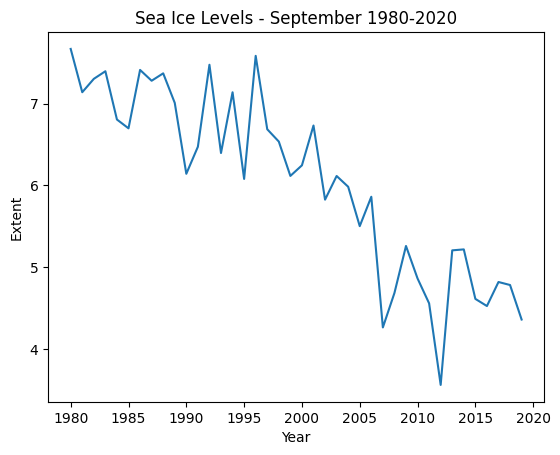

In [6]:
sns.lineplot(data=sept_avg, x="Year", y="Extent")
plt.title("Sea Ice Levels - September 1980-2020")
plt.show()

## Analysis: At both times of year, ice levels are clearly decreasing over the laset 40 years.